# II. Data Visualizations 

The aim of this notebook is to show some visualization of the existing data set.

The information is presented as follows:

1. General Data Exploration: Existing relationships between dataset
2. Label Exploration
    * Exploring relationships between label and numerical features
    * Exploring relationships between label and categorical features 
    * Using Aesthetics to explore relationships between label and numerical/categorical features
 

In [18]:
# import libraries
import pandas as pd
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss
import math

%matplotlib inline
%matplotlib inline

In [19]:
#import data set modiied data set from file Data Preparation(train)
df=pd.read_csv('dfforvisualizations.csv')
df.shape

(17379, 17)

### 1.  General Data Exploration

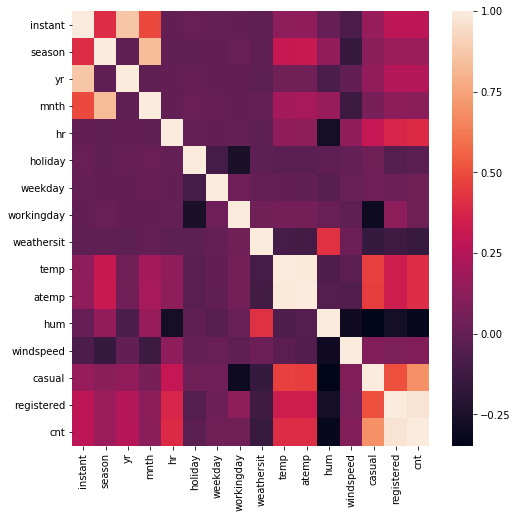

In [20]:
# Let's observe the existing correlations between dataset
plt.figure(figsize=(8,8)) 

sns.heatmap(df.corr())

This chart shows some very interesting correlations, such as product type and warranty, failure rate and product_type:essence, or failure_rate and warranty_years_1


### 2. Label Exploration

In [21]:
## Descriptive statistics for label (in this case it will be attractiveness)
df.cnt.describe()

count    17379.000000
mean       189.463088
std        181.387599
min          1.000000
25%         40.000000
50%        142.000000
75%        281.000000
max        977.000000
Name: cnt, dtype: float64

From the describe statistics, it looks like data follows a normal distribution shape, we'll check it soon

(array([5616., 2669., 2392., 1900., 1413., 1006.,  704.,  552.,  394.,
         263.,  190.,  104.,  105.,   55.,   16.]),
 array([  1.        ,  66.06666667, 131.13333333, 196.2       ,
        261.26666667, 326.33333333, 391.4       , 456.46666667,
        521.53333333, 586.6       , 651.66666667, 716.73333333,
        781.8       , 846.86666667, 911.93333333, 977.        ]),
 <a list of 15 Patch objects>)

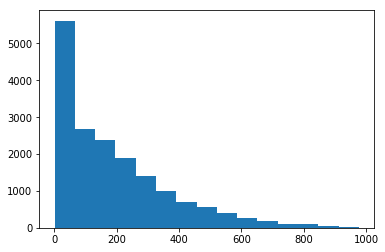

In [22]:
plt.hist(df.cnt,15)


Label histogram shows data for this column is right-skewed

In [23]:
df.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


#### 2.1 Exploring relationships between label and numerical features

Initially, we shall examine the correlation between the most relevant numeric features and the lable. The features have been identified from the best performing model (see jupyter notebook 2 in this project). 


c:\users\florence\anaconda333\envs\deep-learning\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


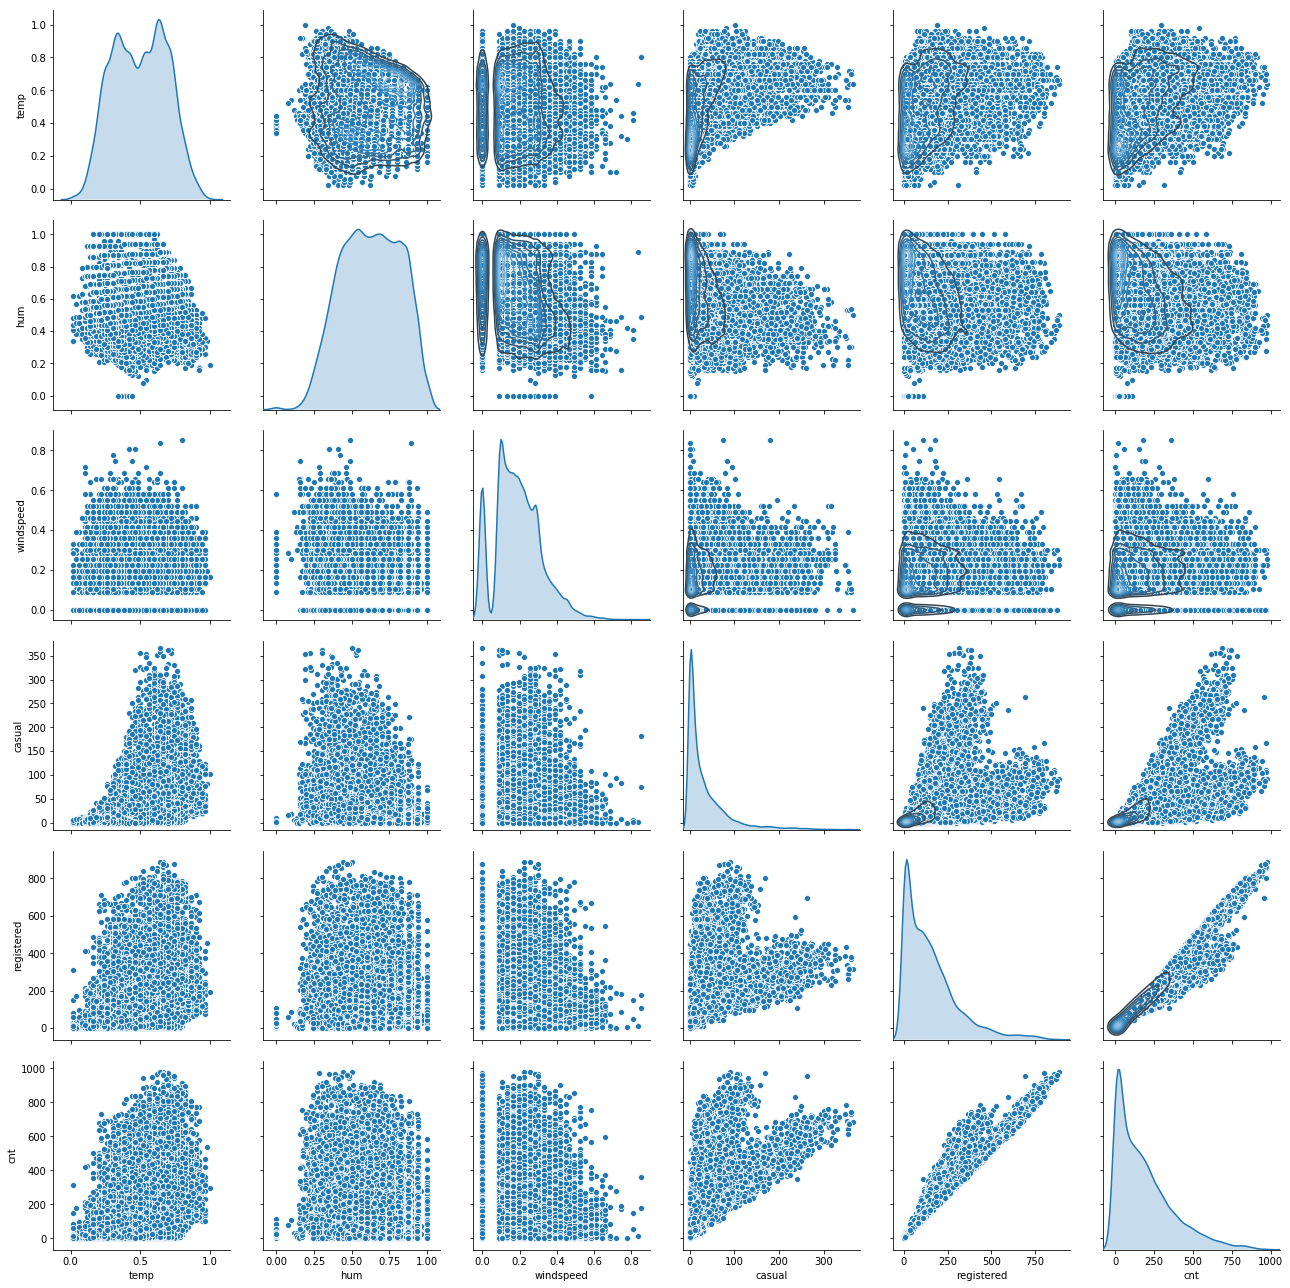

In [24]:
## Create scatter-plot matrix of most important correlations with the label

num_cols1 = ["temp", "hum",
            "windspeed", "casual","registered","cnt"] 
sns.pairplot(df[num_cols1], diag_kind="kde", size=3).map_upper(sns.kdeplot, cmap="Blues_d")

Clearly plots above show a positive correlation between all features. Some of them, like the relationship between the **Registered** or **Casual** usual display a more linear correlation with the label than do others. 
When looking at the most right column, we shall see correlation between these numerical features and the label is positive. 

#### 2.2 Exploring relationships between label and categorical features

In [25]:
df.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

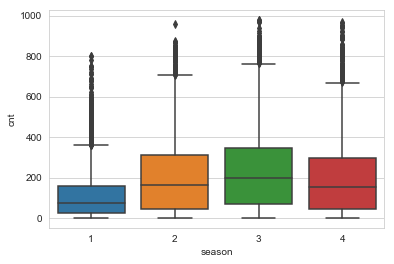

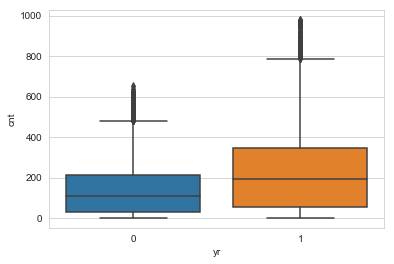

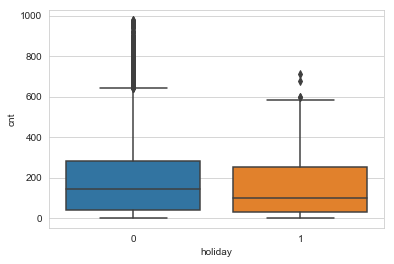

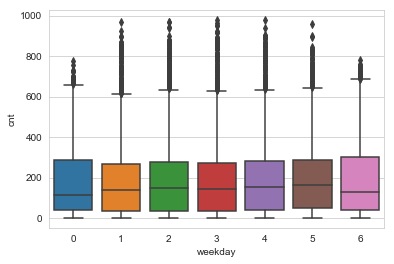

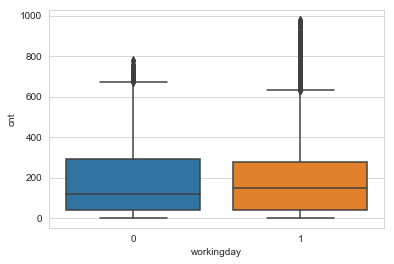

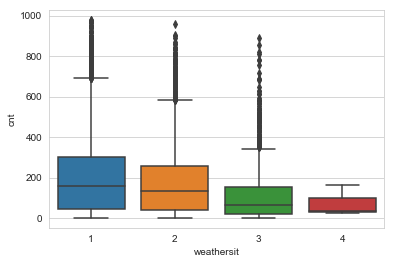

In [26]:
def plot_box(df, cols, col_y='cnt'):
    for col in cols:
        sns.set_style("whitegrid")
        sns.boxplot(col, col_y, data=df)
        plt.xlabel(col)
        plt.ylabel(col_y)
        plt.show()
        
cat_cols = ['season', 'yr','holiday','weekday','workingday', 'weathersit']
plot_box(df, cat_cols)   

When observing the relationship between the label and the categorical variables, we can see that

*  **Median** changes considerably between boxplots of the same category
* **Boxplotsize** shows certain overlapping between categories, while some of them are clearly distinct from others
* From year 0 to 1, number of bike rentals increased.
* Bike rentals median on weekdays doesn't change much, except for friday when it dereases. 
    

#### 2.3 Using Aesthetics to explore relationships between label and numerical/categorical features

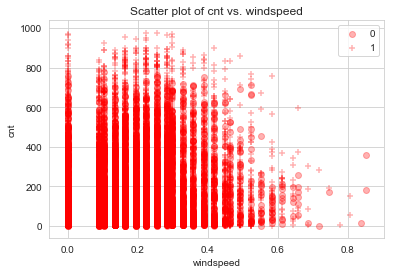

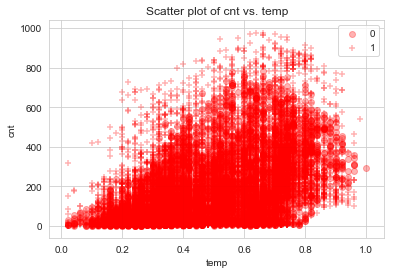

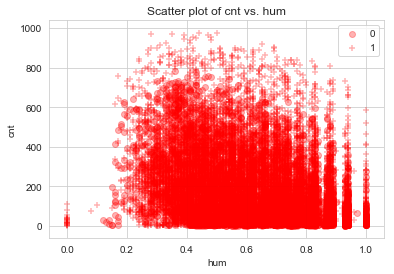

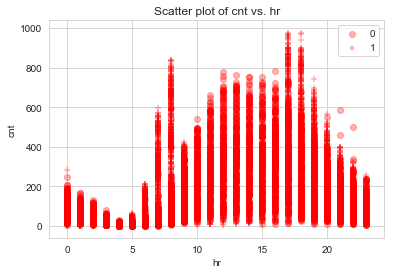

In [48]:
def plot_scatter_shape(df, cols, shape_col = 'workingday', col_y = 'cnt', alpha = 0.3):
    shapes = ['o', '+', 's', 'x', '^'] # pick distinctive shapes
    unique_cats = df[shape_col].unique()
    for col in cols: # loop over the columns to plot
        sns.set_style("whitegrid")
        for i, cat in enumerate(unique_cats): # loop over the unique categories
            temp = df[df[shape_col] == cat]
            sns.regplot(col, col_y, data=temp, marker = shapes[i], label = cat,
                        scatter_kws={"alpha":alpha}, fit_reg = False, color = 'red')
        plt.title('Scatter plot of ' + col_y + ' vs. ' + col) # Give the plot a main title
        plt.xlabel(col) # Set text for the x axis
        plt.ylabel(col_y)# Set text for y axis
        plt.legend()
        plt.show()
            
num_cols = ["windspeed", "temp", "hum","hr"]
plot_scatter_shape(df, num_cols) 

Using aesthetics, we can visualize and better understand data:

* Wind has a negative correlationship with the use fo bikes. 
* Humidity also seems to have negative correlation with the label, but not as pronounced as the one of wind with the label.
* Temperature has clearlity a positive correlationship
* Working hours (from 7 to 21h) the number of bike rental increases.

